In [1]:
import cv2
import os

# Define a function to extract video properties
def get_video_properties(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None

    # Extract properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    duration = frames / fps

    cap.release()

    return {"width": width, "height": height, "frames": frames, "fps": fps, "duration": duration}

In [40]:
# List of all video files
video_files = [
    "dataset/v_ApplyEyeMakeup_g03_c05.avi",
    "dataset/v_ApplyEyeMakeup_g05_c01.avi",
    "dataset/v_ApplyEyeMakeup_g05_c07.avi",
    "dataset/v_ApplyEyeMakeup_g06_c07.avi",
    "dataset/v_ApplyEyeMakeup_g07_c04.avi",
    "dataset/v_ApplyEyeMakeup_g08_c03.avi",
    "dataset/v_ApplyEyeMakeup_g08_c04.avi",
    "dataset/v_ApplyEyeMakeup_g09_c06.avi",
    "dataset/v_ApplyEyeMakeup_g11_c02.avi",
    "dataset/v_ApplyEyeMakeup_g12_c05.avi",
    "dataset/v_ApplyEyeMakeup_g15_c01.avi",
    "dataset/v_ApplyEyeMakeup_g15_c07.avi",
    "dataset/v_BabyCrawling_g01_c01.avi",
    "dataset/v_BabyCrawling_g03_c01.avi",
    "dataset/v_BabyCrawling_g03_c03.avi",
    "dataset/v_BabyCrawling_g07_c05.avi",
    "dataset/v_BabyCrawling_g08_c01.avi",
    "dataset/v_BabyCrawling_g08_c03.avi",
    "dataset/v_BabyCrawling_g10_c03.avi",
    "dataset/v_BabyCrawling_g12_c01.avi",
]

# Extract properties for all videos
all_video_properties = [get_video_properties(video) for video in video_files]
all_video_properties

[{'width': 320, 'height': 240, 'frames': 146, 'fps': 25, 'duration': 5.84},
 {'width': 320, 'height': 240, 'frames': 268, 'fps': 25, 'duration': 10.72},
 {'width': 320, 'height': 240, 'frames': 235, 'fps': 25, 'duration': 9.4},
 {'width': 320, 'height': 240, 'frames': 167, 'fps': 25, 'duration': 6.68},
 {'width': 320, 'height': 240, 'frames': 142, 'fps': 25, 'duration': 5.68},
 {'width': 320, 'height': 240, 'frames': 146, 'fps': 25, 'duration': 5.84},
 {'width': 320, 'height': 240, 'frames': 224, 'fps': 25, 'duration': 8.96},
 {'width': 320, 'height': 240, 'frames': 188, 'fps': 25, 'duration': 7.52},
 {'width': 320, 'height': 240, 'frames': 178, 'fps': 25, 'duration': 7.12},
 {'width': 320, 'height': 240, 'frames': 127, 'fps': 25, 'duration': 5.08},
 {'width': 320, 'height': 240, 'frames': 169, 'fps': 25, 'duration': 6.76},
 {'width': 320, 'height': 240, 'frames': 182, 'fps': 25, 'duration': 7.28},
 {'width': 320, 'height': 240, 'frames': 165, 'fps': 25, 'duration': 6.6},
 {'width': 32

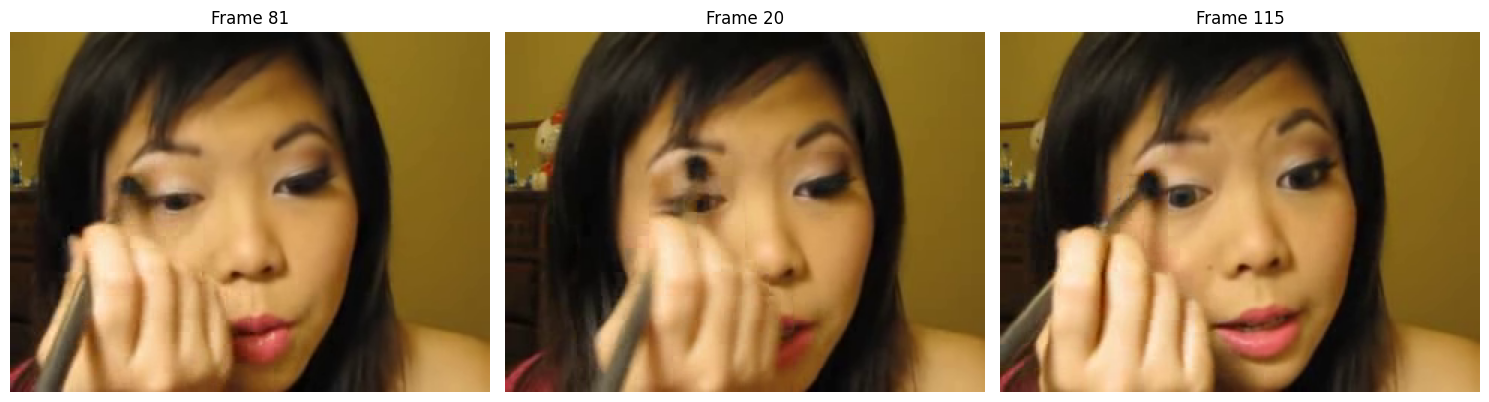

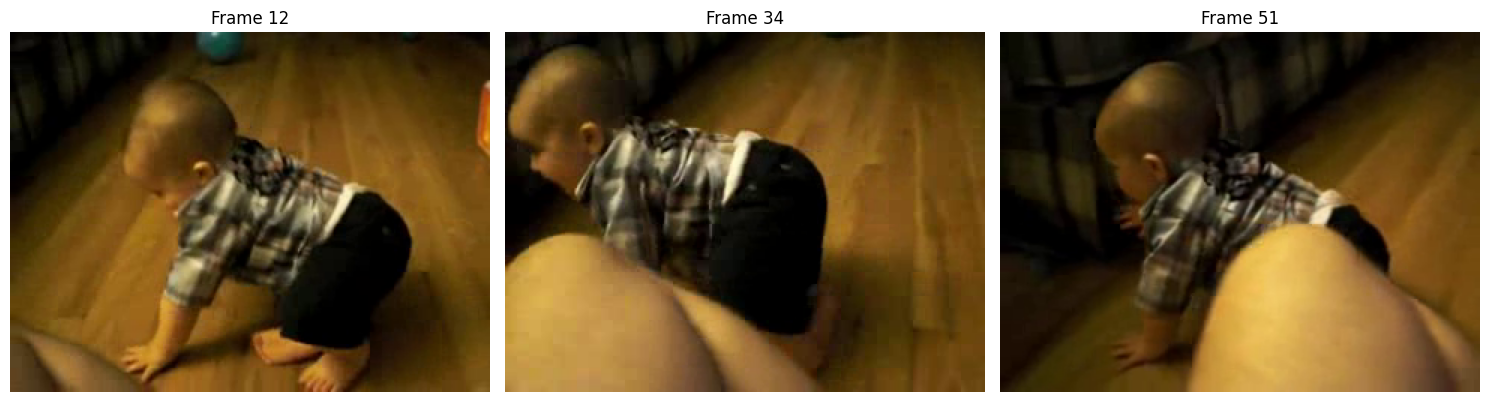

(None, None)

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def display_random_frames(video_path, num_frames=3):
    """Displays random frames from a video."""
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    chosen_frames = np.random.choice(total_frames, num_frames, replace=False)

    fig, axes = plt.subplots(1, num_frames, figsize=(15, 5))

    for idx, frame_num in enumerate(chosen_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
        ret, frame = cap.read()
        if ret:
            # Convert from BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            axes[idx].imshow(frame_rgb)
            axes[idx].axis('off')
            axes[idx].set_title(f"Frame {frame_num}")

    plt.tight_layout()
    plt.show()
    cap.release()

# Display random frames from the video
display_random_frames(video_files[0]), display_random_frames(video_files[len(video_files) - 1])

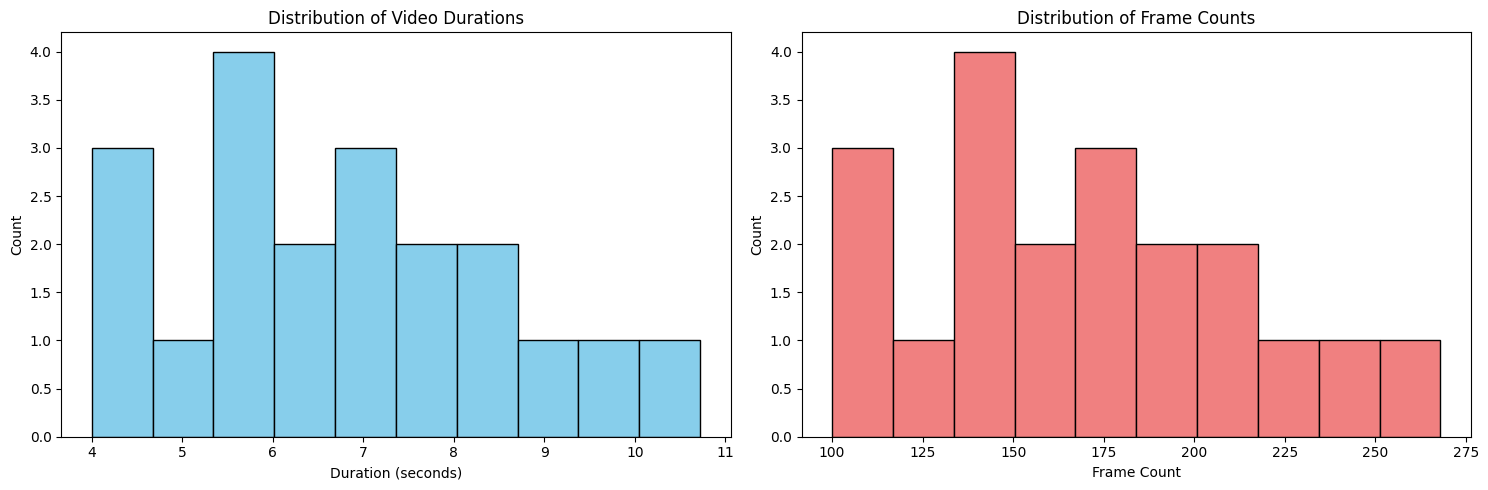

In [70]:
# Extract durations and frame counts for plotting
durations = [video['duration'] for video in all_video_properties if video is not None]
frame_counts = [video['frames'] for video in all_video_properties if video is not None]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting histogram for durations
axes[0].hist(durations, bins=10, edgecolor='black', color='skyblue')
axes[0].set_title('Distribution of Video Durations')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Count')

# Plotting histogram for frame counts
axes[1].hist(frame_counts, bins=10, edgecolor='black', color='lightcoral')
axes[1].set_title('Distribution of Frame Counts')
axes[1].set_xlabel('Frame Count')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [71]:
# Define duration thresholds
min_duration_threshold = 3  # seconds

# Identify videos outside the duration thresholds
anomalous_videos = [video_files[idx] for idx, duration in enumerate(durations)
                    if duration < min_duration_threshold]

anomalous_videos

[]

In [114]:
FRAME_HEIGHT = 224
FRAME_WIDTH = 224
NUM_FRAMES = 16

def preprocess_video(video_path):
    """Load video, extract frames, resize and normalize them."""
    frames = []
    vidcap = cv2.VideoCapture(video_path)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_step = total_frames // NUM_FRAMES

    count = 0
    while True:
        success, frame = vidcap.read()
        if not success:
            break
        if count % frame_step == 0 and len(frames) < NUM_FRAMES:
            # Resize frame
            frame_resized = cv2.resize(frame, (FRAME_WIDTH, FRAME_HEIGHT))
            # Normalize frame
            frame_normalized = frame_resized / 255.0
            frames.append(frame_normalized)
        count += 1
    vidcap.release()

    return np.array(frames)

# Preprocess all videos
videos_data = [preprocess_video(video_file) for video_file in video_files]
len(videos_data), videos_data[0].shape

(20, (16, 224, 224, 3))

In [115]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(FRAME_WIDTH, FRAME_HEIGHT, 3))
base_model.trainable = False

# Model to extract spatial features
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features for each video
videos_features = [feature_extractor.predict(video_data) for video_data in videos_data]
len(videos_features), videos_features[0].shape

1/1 [==============================] - 0s 25ms/step


(20, (16, 7, 7, 1280))

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten

# Define the CNN-LSTM model
model = Sequential()

# Add the pre-trained MobileNetV2 base model for spatial feature extraction
model.add(TimeDistributed(feature_extractor, input_shape=(NUM_FRAMES, FRAME_WIDTH, FRAME_HEIGHT, 3)))

# Flatten the feature maps before feeding to LSTM
model.add(TimeDistributed(Flatten()))

# Add LSTM layer for temporal feature extraction
model.add(LSTM(128, return_sequences=False))

# Classification layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
labels = [video_file.split("/")[-1].split("_")[1] for video_file in video_files]
unique_labels = list(set(labels))
label_to_index = {label: index for index, label in enumerate(unique_labels)}
y = np.array([label_to_index[label] for label in labels])

In [94]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
from sklearn.model_selection import train_test_split

X = np.array(videos_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [110]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=4)

Epoch 1/10


4/4 [==============================] - 4s 479ms/step - loss: 0.2930 - accuracy: 0.8125 - val_loss: 0.2781 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 2s 439ms/step - loss: 0.1501 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 2s 427ms/step - loss: 0.0598 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 2s 432ms/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 2s 437ms/step - loss: 0.0520 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 2s 423ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 2s 430ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 1.0000
Epoch 8/10
4/4 [===============

In [111]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 239ms/step - loss: 0.0472 - accuracy: 1.0000
Test accuracy: 100.00%


In [113]:
predictions = model.predict(X_test)
predicted_labels = [unique_labels[np.argmax(prediction)] for prediction in predictions]

predicted_labels

1/1 [==============================] - 0s 207ms/step


['ApplyEyeMakeup', 'ApplyEyeMakeup', 'ApplyEyeMakeup', 'ApplyEyeMakeup']